In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate

from CortesAnalysisPackage import plot as pt
from CortesAnalysisPackage import peakfitting as pfa
from CortesAnalysisPackage import componentfitting as ca
from CortesAnalysisPackage import classical as cla
# Import
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import linregress

df = pd.read_pickle("DetectorReadings.pkl")
bins = df['bins'].values
df = df.drop(columns=['bins'])

exp_df = pd.read_pickle('ExpirementData.pkl')

In [3]:
df

,7x7x7_Si_001000,7x7x7_Al_001001,7x7x7_H_001002,7x7x7_Na_001003,7x7x7_O_001004,7x7x7_Fe_001005,7x7x7_Mg_001006,7x7x7_C_001007,7x7x7_SiO2_001008,7x7x7_Al2O3_001009,...,7x7x7_C_0600_Feldspar_Fill_003142,7x7x7_C_1000_Feldspar_Fill_003143,7x7x7_C_2000_Feldspar_Fill_003144,7x7x7_C_3000_Feldspar_Fill_003145,7x7x7_C_4000_Feldspar_Fill_003146,7x7x7_C_5000_Feldspar_Fill_003147,7x7x7_C_6000_Feldspar_Fill_003148,7x7x7_C_7000_Feldspar_Fill_003149,7x7x7_C_8000_Feldspar_Fill_003150,7x7x7_C_9000_Feldspar_Fill_003151
0,8.404120e-04,1.064090e-03,1.469400e-05,7.596800e-04,1.584100e-05,1.643980e-03,9.120430e-04,8.543980e-04,8.642660e-04,9.635360e-04,...,8.708300e-04,8.658780e-04,8.508560e-04,8.344220e-04,8.186930e-04,7.965010e-04,7.680210e-04,7.302290e-04,6.736890e-04,5.929290e-04
1,6.850000e-07,8.950000e-07,1.100000e-08,6.040000e-07,1.100000e-08,1.489000e-06,7.630000e-07,6.880000e-07,6.930000e-07,8.150000e-07,...,7.270000e-07,7.320000e-07,6.490000e-07,6.600000e-07,6.210000e-07,6.160000e-07,6.460000e-07,6.000000e-07,5.630000e-07,4.980000e-07
2,6.008020e-04,7.947000e-04,1.100900e-05,5.416380e-04,1.176700e-05,1.330060e-03,6.535110e-04,6.176260e-04,6.090960e-04,6.937200e-04,...,6.173560e-04,6.133160e-04,6.039490e-04,5.949720e-04,5.841830e-04,5.686090e-04,5.504250e-04,5.216640e-04,4.817800e-04,4.259010e-04
3,4.206310e-04,5.775430e-04,7.965000e-06,3.816200e-04,8.406000e-06,1.047290e-03,4.585130e-04,4.379550e-04,4.213330e-04,4.886230e-04,...,4.298310e-04,4.275570e-04,4.219220e-04,4.156770e-04,4.081580e-04,3.991210e-04,3.856030e-04,3.669890e-04,3.391830e-04,2.990280e-04
4,2.027580e-04,2.917970e-04,3.990000e-06,1.885240e-04,4.226000e-06,5.645540e-04,2.268500e-04,2.148290e-04,1.984800e-04,2.372060e-04,...,2.056070e-04,2.042030e-04,2.030920e-04,2.003200e-04,1.971800e-04,1.929110e-04,1.870590e-04,1.780250e-04,1.638170e-04,1.442870e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2.780000e-07,2.610000e-07,3.000000e-09,1.930000e-07,4.000000e-09,1.830000e-07,4.100000e-07,2.230000e-07,2.470000e-07,2.300000e-07,...,2.410000e-07,2.430000e-07,2.320000e-07,2.590000e-07,2.550000e-07,2.560000e-07,2.460000e-07,2.070000e-07,2.080000e-07,1.760000e-07
931,3.110000e-07,2.640000e-07,2.000000e-09,2.010000e-07,3.000000e-09,2.030000e-07,4.150000e-07,2.240000e-07,2.320000e-07,2.300000e-07,...,2.310000e-07,2.200000e-07,2.390000e-07,2.420000e-07,2.170000e-07,2.470000e-07,2.250000e-07,2.130000e-07,2.130000e-07,1.850000e-07
932,2.910000e-07,2.590000e-07,3.000000e-09,2.220000e-07,6.000000e-09,1.770000e-07,4.260000e-07,2.420000e-07,2.380000e-07,2.310000e-07,...,2.600000e-07,2.500000e-07,2.420000e-07,2.420000e-07,2.340000e-07,2.430000e-07,2.150000e-07,2.220000e-07,2.050000e-07,1.790000e-07
933,2.950000e-07,2.370000e-07,4.000000e-09,2.070000e-07,4.000000e-09,1.660000e-07,3.930000e-07,2.140000e-07,2.250000e-07,2.170000e-07,...,2.290000e-07,2.590000e-07,2.240000e-07,2.260000e-07,2.370000e-07,2.450000e-07,2.170000e-07,2.090000e-07,1.990000e-07,1.740000e-07


In [4]:
df.values.T.shape
# 34 spectra, 935 energy bins

(175, 935)

In [5]:
import tqdm

In [6]:
import numpy as np
from scipy.optimize import nnls


In [7]:
# 1. Prepare measured spectrum Y (shape: [num_bins,])
Y = df.values  # shape: (935, 34) if you want all spectra, or (935,) for one


In [8]:
# 2. Construct response matrix R (shape: [num_bins, num_channels])
# Example: R = ... (you need to build this based on your detector's calibration)
# For demonstration, let's use a placeholder:
num_bins = Y.shape[0]
num_channels = num_bins  # or set as needed
R = np.eye(num_bins)

# Construct response matrix R using the GEB (Generalized Energy Bin) formula
# GEB: GEB -0.026198 0.059551 -0.037176
geb_a = -0.026198
geb_b = 0.059551
geb_c = -0.037176

# Define GEB coefficients
geb_a = -0.026198
geb_b = 0.059551
geb_c = -0.037176

# Calculate FWHM for each energy bin
FWHM = geb_a + geb_b * np.sqrt(bins) + geb_c * bins**2
sigma = FWHM / 2.355  # Convert FWHM to standard deviation


In [9]:

sigma = np.abs(sigma)  # Ensure sigma is non-negative

In [10]:
# Initialize response matrix R
R = np.zeros((num_bins, num_bins))
for j in range(num_bins):  # Loop over columns (channels)
    # Gaussian response for energy bin i and channel j
    E_j = bins[j]
    sigma_j = sigma[j]
    
    # Discretize integral using small energy steps
    E_steps = bins
    gaussian = (1 / (np.sqrt(2 * np.pi) * sigma_j)) * np.exp(-((E_steps - E_j)**2) / (2 * sigma_j**2))
    gaussian /= np.sum(gaussian)  # Normalize the Gaussian

    R[j, :] = gaussian

# Response matrix R is now constructed
print("Response matrix shape:", R.shape)

Response matrix shape: (935, 935)


In [11]:
R.shape

(935, 935)

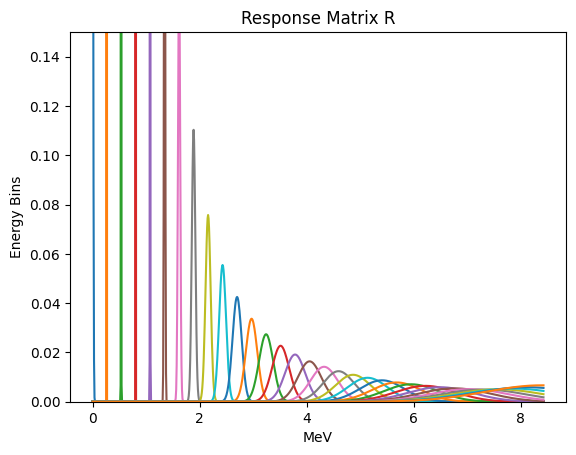

In [12]:
plt.figure()
for i in range(R.shape[0]):
    if i % 30 == 0:
        plt.plot(bins, R[i, :], label=f'Bin {i}')
# plt.legend()
# plt.colorbar(label='Response')
plt.title('Response Matrix R')
plt.xlabel('MeV')
plt.ylabel('Energy Bins')
plt.ylim(0, .15)
plt.show()

/tmp/ipykernel_928030/853230510.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


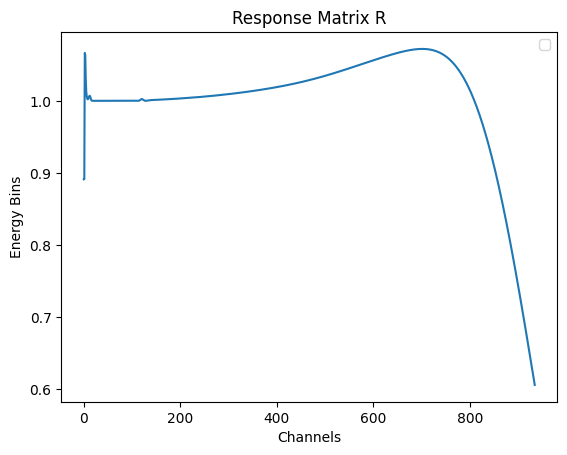

In [13]:
plt.figure()
plt.plot(R.sum(axis=0))
plt.legend()
# plt.colorbar(label='Response')
plt.title('Response Matrix R')
plt.xlabel('Channels')
plt.ylabel('Energy Bins')
# plt.yscale('log')
plt.show()

In [ ]:



# 3. Set weights v_i (often 1/y_i or 1 if unknown)
v = np.ones(num_bins)  # or v = 1.0 / (Y + 1e-6) to avoid division by zero

# 4. Weighted least squares: minimize sum_i v_i * (sum_j R_ij x_j - y_i)^2, x_j >= 0
# This can be solved by transforming to standard NNLS:
# sqrt(V) * R * x = sqrt(V) * Y
sqrt_v = np.sqrt(v)
R_weighted = R * sqrt_v[:, np.newaxis]
Y_weighted = Y * sqrt_v[:, np.newaxis] if Y.ndim > 1 else Y * sqrt_v

# 5. Solve for each spectrum (if multiple)
X_est = []
for i in tqdm.tqdm(range(Y_weighted.shape[1])):
    x, _ = nnls(
        R_weighted, 
        Y_weighted[:, i],
        atol=1e-12,  # Set tolerance for convergence
        )
    X_est.append(x)
X_est = np.array(X_est)  # shape: (34, num_channels)

# 6. X_est now contains the unfolded spectra



 46%|████▋     | 81/175 [03:15<05:54,  3.77s/it]

In [ ]:
(np.matmul(R_weighted, X_est[0])).shape

(935,)

In [ ]:
exp_df

,soil_resolution,function,id,filename,avg_carbon_portion,spectrum_bins,spectrum_tally,elem_maps,avg_densities
0,7x7x7,Si,1000,7x7x7_Si_001000,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000840412, 6.85e-07, 0.000600802, 0.0004206...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2.33000
1,7x7x7,Al,1001,7x7x7_Al_001001,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.00106409, 8.95e-07, 0.0007947, 0.000577543,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",2.70000
2,7x7x7,H,1002,7x7x7_H_001002,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[1.4694e-05, 1.1e-08, 1.1009e-05, 7.965e-06, 3...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.00100
3,7x7x7,Na,1003,7x7x7_Na_001003,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.00075968, 6.04e-07, 0.000541638, 0.00038162...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",0.97000
4,7x7x7,O,1004,7x7x7_O_001004,0.0,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[1.5841e-05, 1.1e-08, 1.1767e-05, 8.406e-06, 4...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",0.00143
...,...,...,...,...,...,...,...,...,...
170,7x7x7,C_5000_Feldspar_Fill,3147,7x7x7_C_5000_Feldspar_Fill_003147,0.5,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000796501, 6.16e-07, 0.000568609, 0.0003991...","[0.15892848226619807, 0.08468110812564669, 0.0...",1.54000
171,7x7x7,C_6000_Feldspar_Fill,3148,7x7x7_C_6000_Feldspar_Fill_003148,0.6,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000768021, 6.46e-07, 0.000550425, 0.0003856...","[0.12714278581295765, 0.06774488650051685, 0.0...",1.33800
172,7x7x7,C_7000_Feldspar_Fill,3149,7x7x7_C_7000_Feldspar_Fill_003149,0.7,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000730229, 6e-07, 0.000521664, 0.000366989,...","[0.0953570893597193, 0.050808664875387946, 0.0...",1.13600
173,7x7x7,C_8000_Feldspar_Fill,3150,7x7x7_C_8000_Feldspar_Fill_003150,0.8,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000673689, 5.63e-07, 0.00048178, 0.00033918...","[0.06357139290647883, 0.0338724432502584, 0.0,...",0.93400


In [ ]:
j = 165


xlim = (3, 5)
y_filter = [(bins >= xlim[0]) & (bins <= xlim[1])][0]
unfolded_spectrum = (X_est[j])[y_filter]

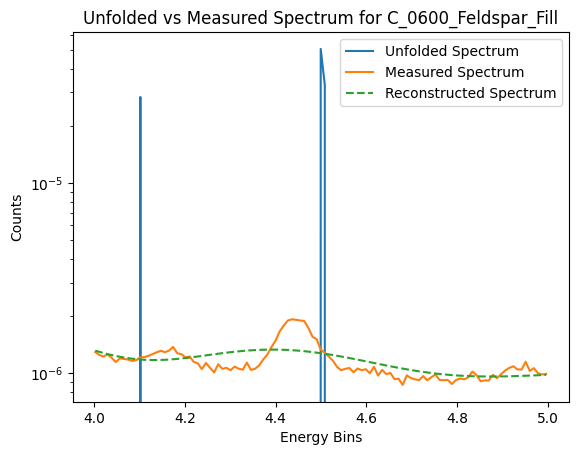

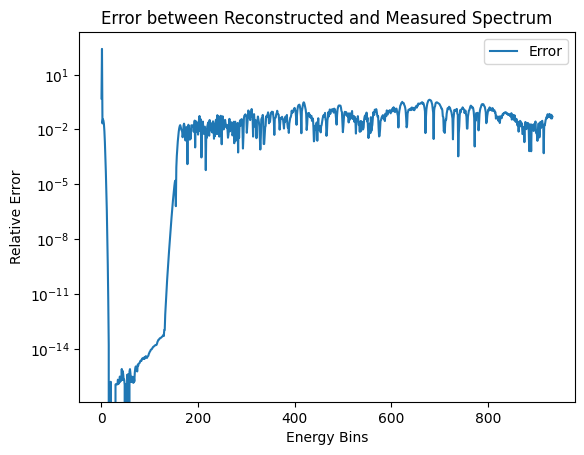

In [ ]:
j = 165

xlim = (4, 5)
y_filter = [(bins >= xlim[0]) & (bins <= xlim[1])][0]
unfolded_spectrum = (X_est[j])[y_filter]
measured_spectrum = Y_weighted[:, j][y_filter]
reconstructed_spectrum = np.matmul(R_weighted, X_est[j])[y_filter]

_bins = bins[y_filter]

plt.plot(_bins, unfolded_spectrum, label='Unfolded Spectrum')
plt.plot(_bins, measured_spectrum, label='Measured Spectrum')
plt.plot(_bins, reconstructed_spectrum, label='Reconstructed Spectrum', linestyle='--')
plt.legend()
plt.title('Unfolded vs Measured Spectrum for {}'.format(exp_df['function'][j]))
plt.xlabel('Energy Bins')
plt.ylabel('Counts')
# plt.ylim(-1e-7, 5 * np.mean(Y_weighted[:, 0]))
# plt.xlim(, 5)
plt.yscale('log')
plt.show()

# calculate error between reconstructed and measured spectrum
error = np.abs((np.matmul(R_weighted, X_est[j]) - Y_weighted[:, j]) / (Y_weighted[:, j] + 1e-6))
plt.plot(error, label='Error')
plt.title('Error between Reconstructed and Measured Spectrum')
plt.xlabel('Energy Bins')
plt.ylabel('Relative Error')
plt.legend()
plt.yscale('log')
plt.show()

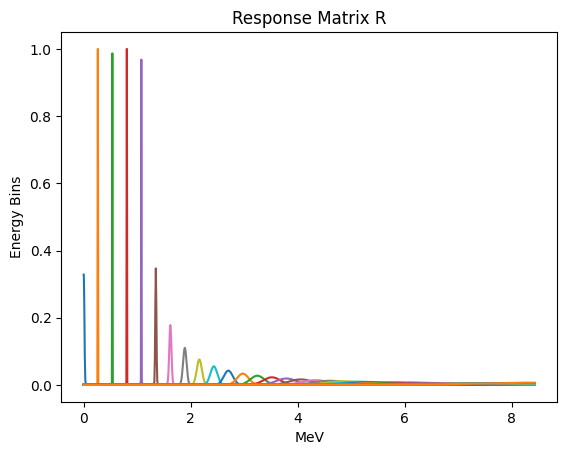

In [ ]:
plt.figure()
for i in range(R_weighted.shape[0]):
    if i % 30 == 0:
        plt.plot(bins, R[i, :], label=f'Bin {i}')
# plt.legend()
# plt.colorbar(label='Response')
plt.title('Response Matrix R')
plt.xlabel('MeV')
plt.ylabel('Energy Bins')
# plt.yscale('log')
plt.show()

In [ ]:
true_c_concentrations = exp_df['avg_carbon_portion'].to_numpy()
train_index = [22, 23]
test_index = np.arange(len(exp_df))
test_index = np.delete(test_index, train_index)

In [ ]:
train_mask = np.array([True if i in train_index else False for i in range(len(exp_df))])
test_mask = np.array([True if i in test_index else False for i in range(len(exp_df))])


In [ ]:
X_est.shape

(175, 935)

In [ ]:
carbon_energy_bins = np.argwhere((bins > 4.43) & (bins < 4.6))

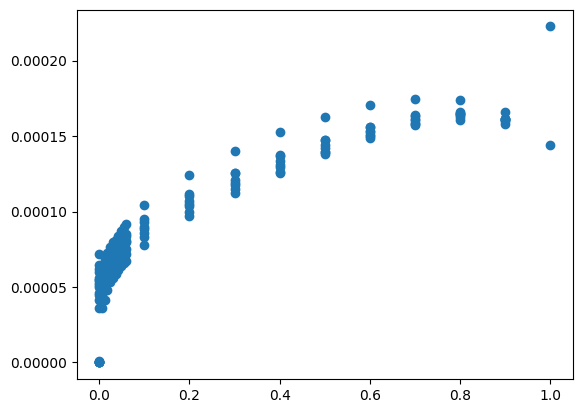

In [ ]:


_X = X_est[:, carbon_energy_bins]
_X =_X.sum(axis=1)

plt.scatter(true_c_concentrations, _X)
# plt.ylim(0, .00001)

In [ ]:
_X

NameError: name '_X' is not defined